<H1>DATA SET 3 INSURANCE CLAIM BY LOGISTIC REGRESSION

<H2> NO.OF ROWS -1338

<H2> NO.OF.COLUMNS -9

In [23]:
df=read.csv("C:/Users/LENOVO/Desktop/sem II/R/ds/Logistic/insurance3r2.csv")

In [24]:
head(df)

age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
19,0,27.900,3009,0,1,3,16884.924,1
18,1,33.770,3008,1,0,2,1725.552,1
28,1,33.000,3009,3,0,2,4449.462,0
33,1,22.705,10009,0,0,1,21984.471,0
32,1,28.880,8010,0,0,1,3866.855,1
31,0,25.740,8005,0,0,2,3756.622,0


In [25]:
head(is.na(df))

age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


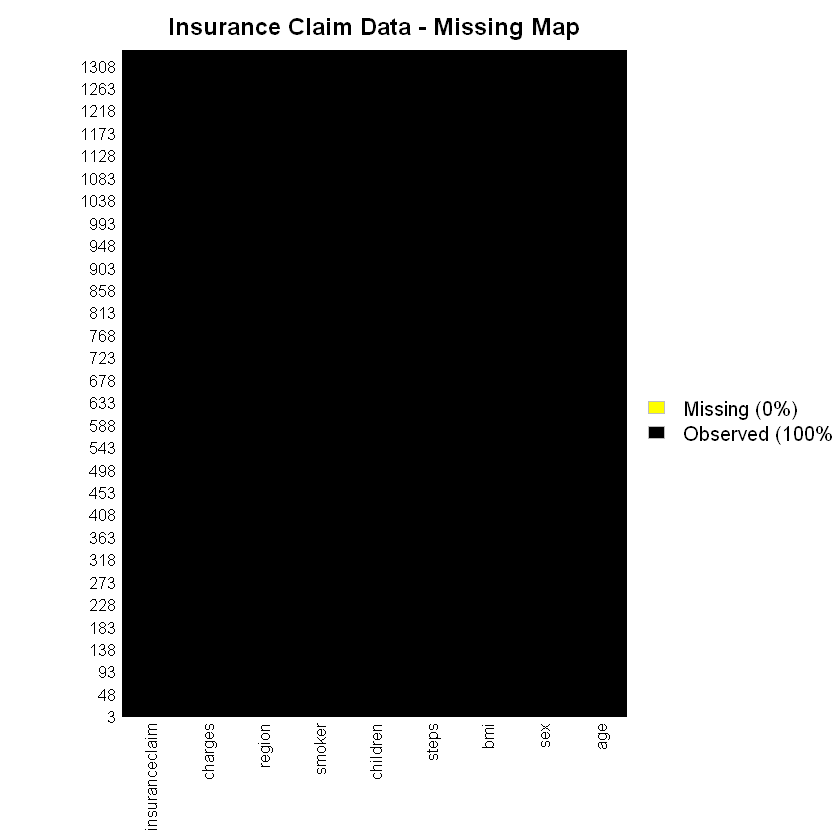

In [26]:
library(Amelia)
missmap(df,main="Insurance Claim Data - Missing Map",
       col=c("yellow","black"), legend=TRUE)

<h3> From this we can infer that there is no missing data present in  the data

In [27]:
library(ggplot2)

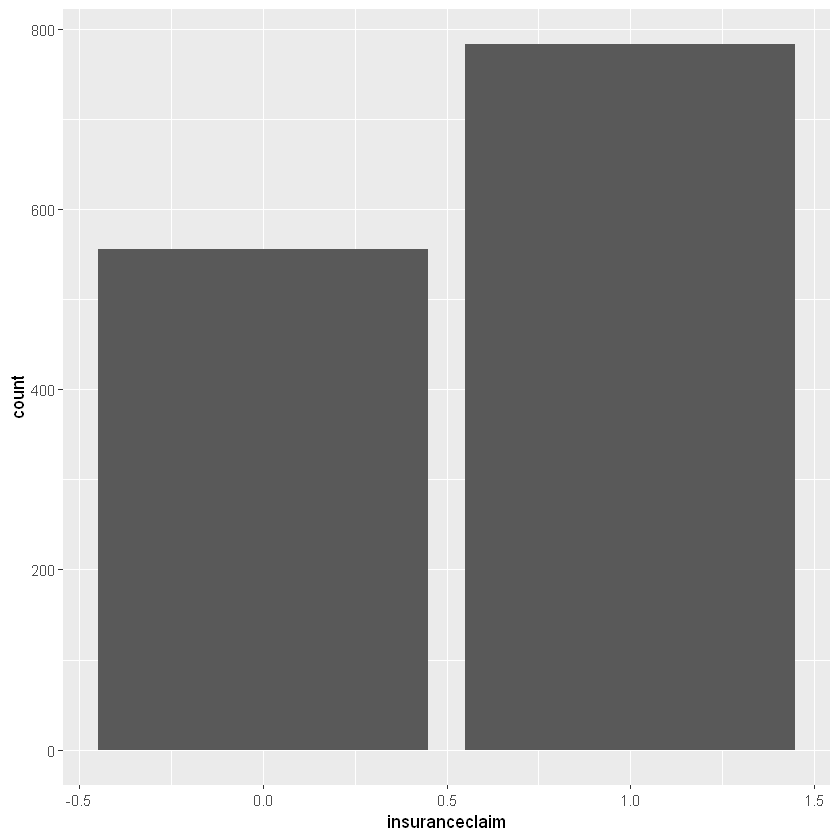

In [28]:
ggplot(df,aes(insuranceclaim)) + geom_bar()

<h3> Graphical representation of actual insurance Claim made

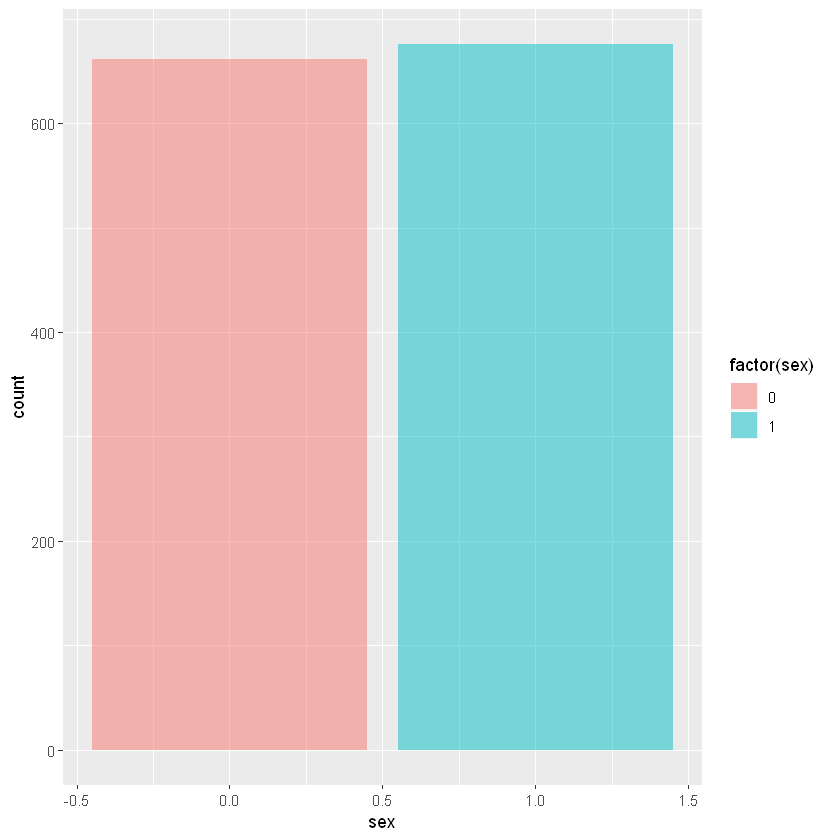

In [29]:
ggplot(df,aes(sex)) + geom_bar(aes(fill=factor(sex)),alpha=0.5)

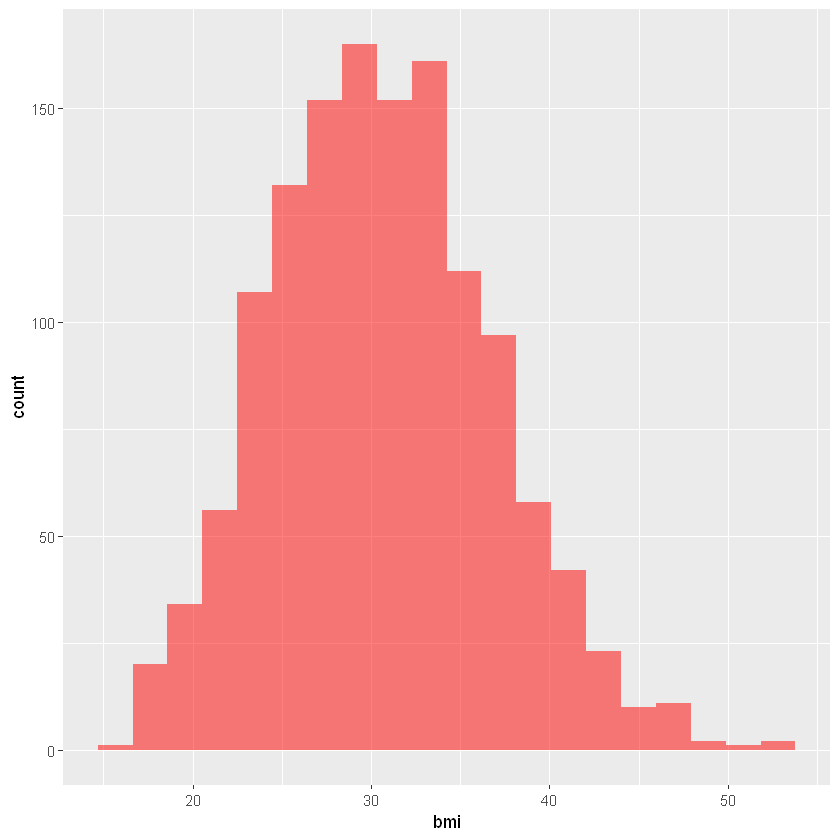

In [30]:
ggplot(df,aes(bmi)) + geom_histogram(fill='red',bins=20,alpha=0.5)

<h3> The Histogram indicating the people having bmi of Lean, normal and obese

In [31]:
str(df)

'data.frame':	1338 obs. of  9 variables:
 $ age           : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex           : int  0 1 1 1 1 0 0 0 1 0 ...
 $ bmi           : num  27.9 33.8 33 22.7 28.9 ...
 $ steps         : int  3009 3008 3009 10009 8010 8005 3002 8007 8002 5008 ...
 $ children      : int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker        : int  1 0 0 0 0 0 0 0 0 0 ...
 $ region        : int  3 2 2 1 1 2 2 1 0 1 ...
 $ charges       : num  16885 1726 4449 21984 3867 ...
 $ insuranceclaim: int  1 1 0 0 1 0 1 0 0 0 ...


In [36]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



<h3> We are converting certain variables into factors for better understanding of data

In [37]:
df$sex=factor(df$sex)
df$children=factor(df$children)
df$smoker=factor(df$smoker)
df$region=factor(df$region)

In [38]:
str(df)

'data.frame':	1338 obs. of  9 variables:
 $ age           : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex           : Factor w/ 2 levels "0","1": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi           : num  27.9 33.8 33 22.7 28.9 ...
 $ steps         : int  3009 3008 3009 10009 8010 8005 3002 8007 8002 5008 ...
 $ children      : Factor w/ 6 levels "0","1","2","3",..: 1 2 4 1 1 1 2 4 3 1 ...
 $ smoker        : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 1 ...
 $ region        : Factor w/ 4 levels "0","1","2","3": 4 3 3 2 2 3 3 2 1 2 ...
 $ charges       : num  16885 1726 4449 21984 3867 ...
 $ insuranceclaim: int  1 1 0 0 1 0 1 0 0 0 ...


In [39]:
df=select(df,-sex,-steps,-region,-charges)

In [40]:
library(caTools)
set.seed(101)

In [41]:
split=sample.split(df$insuranceclaim,SplitRatio=0.70)
final.train=subset(df,split==TRUE)
final.test=subset(df,split==FALSE)

<h3>  Here we are making a sample of training and testing data separately

In [42]:
final.log.model=glm(formula=insuranceclaim ~ . , family=binomial(link='logit'),data=final.train)

<h3>  So the training set is decided. now we are going to run the model to get the results

In [43]:
summary(final.log.model)


Call:
glm(formula = insuranceclaim ~ ., family = binomial(link = "logit"), 
    data = final.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0500  -0.5797   0.1195   0.4674   3.3407  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.487204   0.705693 -10.610  < 2e-16 ***
age          0.025811   0.007363   3.505 0.000456 ***
bmi          0.271112   0.022410  12.098  < 2e-16 ***
children1   -2.048357   0.253818  -8.070 7.02e-16 ***
children2   -3.628709   0.319041 -11.374  < 2e-16 ***
children3   -4.567986   0.407493 -11.210  < 2e-16 ***
children4   -6.145957   1.143545  -5.374 7.68e-08 ***
children5   -3.466867   0.953905  -3.634 0.000279 ***
smoker1      4.261559   0.392846  10.848  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1270.09  on 935  degrees of freedom
Residual deviance:  661.23  on 927  degrees of fr

<h3> Prediction accuracy

In [44]:
fitted.probabilities=predict(final.log.model,newdata=final.test,type='response')

<h3> Lets calculated from predicted values

In [45]:
fitted.results=ifelse(fitted.probabilities>0.5,1,0)

In [46]:
misClasificError=mean(fitted.results != final.test$insuranceclaim)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.860696517412935"


<h1> The model is able to achieve 86% accuracy

In [47]:
#confusion Matrix
table(final.test$insuranceclaim, fitted.probabilities>0.5)

   
    FALSE TRUE
  0   137   30
  1    26  209

<h3> 137 people out of 402 were predicted not to insurance claims and actually they have not claimedd(TRUE NEGATIVE)

<H3>30 PEOPLE OUT OF 402 WERE PREDICTED NOT TO INSURANCE CLAIMS AND THEY ACTUALLY HAVE  MADE ANY INSURANCE CLAIMS(FALSE POSITIVE)

<H3>26 people out of 402 were predicted  to make any insurance claims and actually they have NOT made insurance claim(FALSE NEGATIVE)

<H3>209 PEOPLE OUT OF 402 WERE PREDICTED TO MAKE INSURANCE CLAIMS AND ACTUALLY THEY HAVE MAKE INSURANCE CLAIMS (TRUE POSITIVE)¶

<h3> our model has correctly predicted that 209 out of 235 insurance are claimed  which is actually 235

In [48]:
library(pROC)

Warning message:
"package 'pROC' was built under R version 3.6.2"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



In [49]:
test_prob=predict(final.log.model,newdata=final.test,type="response")

Setting levels: control = 0, case = 1
Setting direction: controls < cases


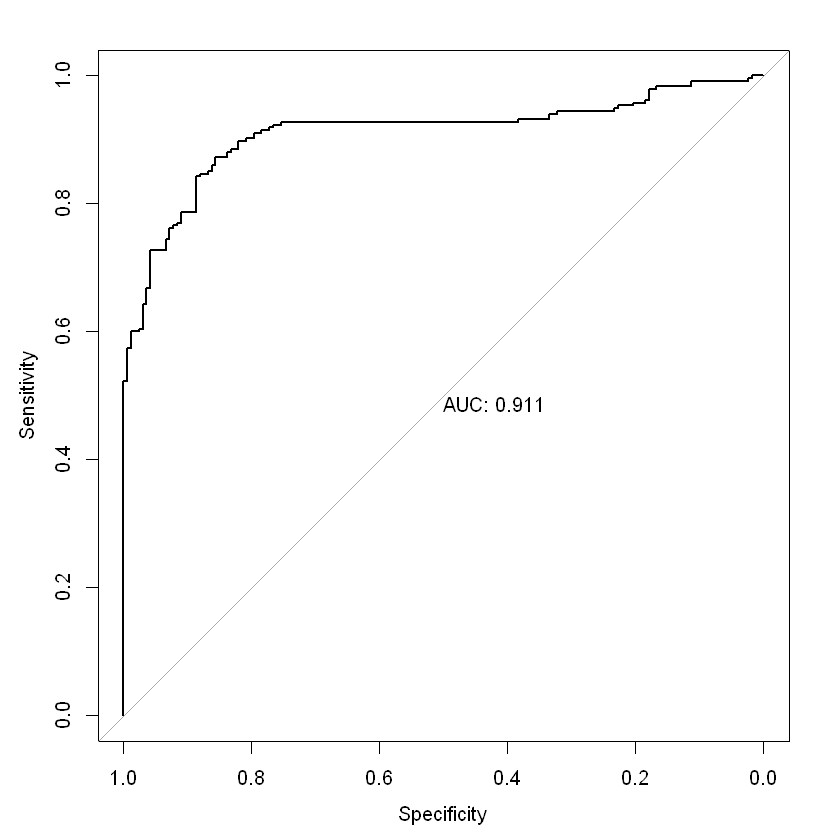

In [50]:
test_roc=roc(final.test$insuranceclaim~fitted.probabilities,plot=TRUE,print.auc=TRUE)

<h1> ROC is plotted between True Positive Rate (Sensitivity)(Y axis) and False Positive Rate(Specificity)(x axis)

<h3> True Positive Rate indicates how many positive values, out of all positive values, have been correctly predicted. The formula to calculate the true positive rate is (TP/(TP + FN))

<H3> True negative rate inicates how many negative values, out of all negative values have been correctly predicted. The formula to calculate negative rate is (TN/(TN+FP))

<H1> Since the are under the curve is 0.911. It means that 91.1% the model is able to distinguish between positive an negative class. i.e the model is able to explain the variations of insurance claims that can be defined by age, bmi,smoking,number of children

In [ ]:
<h3> Error Rate =